# Continuation of testing pytesseract #

Initial imports

In [1]:
import cv2
import pytesseract

Check the help on cv2.imread

In [8]:
help(cv2.imread)

Help on built-in function imread:

imread(...)
    imread(filename[, flags]) -> retval
    .   @brief Loads an image from a file.
    .   
    .   @anchor imread
    .   
    .   The function imread loads an image from the specified file and returns it. If the image cannot be
    .   read (because of missing file, improper permissions, unsupported or invalid format), the function
    .   returns an empty matrix ( Mat::data==NULL ).
    .   
    .   Currently, the following file formats are supported:
    .   
    .   -   Windows bitmaps - \*.bmp, \*.dib (always supported)
    .   -   JPEG files - \*.jpeg, \*.jpg, \*.jpe (see the *Notes* section)
    .   -   JPEG 2000 files - \*.jp2 (see the *Notes* section)
    .   -   Portable Network Graphics - \*.png (see the *Notes* section)
    .   -   WebP - \*.webp (see the *Notes* section)
    .   -   Portable image format - \*.pbm, \*.pgm, \*.ppm \*.pxm, \*.pnm (always supported)
    .   -   Sun rasters - \*.sr, \*.ras (always supported)
    .

Check the help on pytesseract.image_to_string

In [9]:
help(pytesseract.image_to_string)

Help on function image_to_string in module pytesseract.pytesseract:

image_to_string(image, lang=None, config='', nice=0, output_type='string', timeout=0)
    Returns the result of a Tesseract OCR run on the provided image to string



**Lets test pytesseract with an image screenshot of my Github repository for this project**

<img src="../images/demo/github_screenshot.png">

Use cv2.imread to read in the file

In [10]:
img_github = cv2.imread("../images/demo/github_screenshot.png")

Find out a little more about img_github

In [11]:
type(img_github)

numpy.ndarray

In [12]:
img_github.shape

(568, 1053, 3)

Use pytesseract to extract the text

In [15]:
txt_img_github = pytesseract.image_to_string(img_github)

In [16]:
print(txt_img_github)

O bdowdell/ pytesseract_testing @unwatchy 1 wWStar 0 YFork 0

 

«> Code Issues 0 Pull requests 0 Actions Projects 0 wiki Security Insights Settings

Testing out Pytesseract Edit

Manage topics

®3 commits 1 branch 0 packages © releases 22.1 contributor

 

 

Branch: master> || New pullrequest Create newfile | Uploadifles Find file a
EB) bsonden Removes an untracked tle Latest commit eeseabe 10 minutes ago
li imagesidemo Initial commit 10 hours ago
lanb Removes an untracked file 10 minutes ago
© gitignore Adds .gitignore 2 hours ago
B environmentyml Initial commit 10 hours ago

 

Help people interested in this repository understand your project by adding a README.


Not bad...

Definitely struggled with some of the symbols adjacent to text

**Import matplotlib.  Let's see if we can visualize img_github**

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

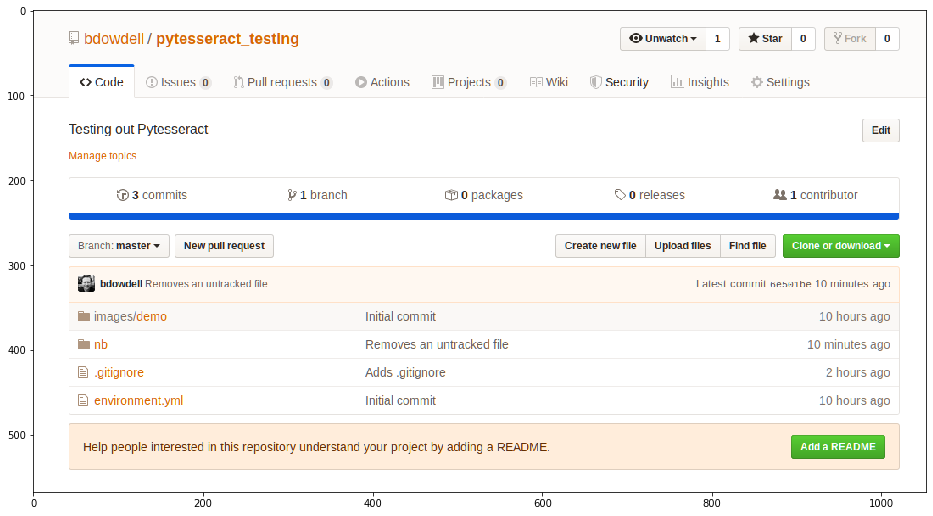

In [19]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot()
ax.imshow(img_github)

While the image technically looks correct, the colors are not.  This is because cv2.imread stores them in BGR instead of RGB

In [21]:
import numpy as np

In [46]:
img_github_rgb = img_github.copy()

In [53]:
img_github_rgb[:, :, 0], img_github_rgb[:, :, 2] = img_github_rgb[:, :, 2], img_github_rgb[:, :, 0]

In [54]:
img_github_rgb.shape

(568, 1053, 3)

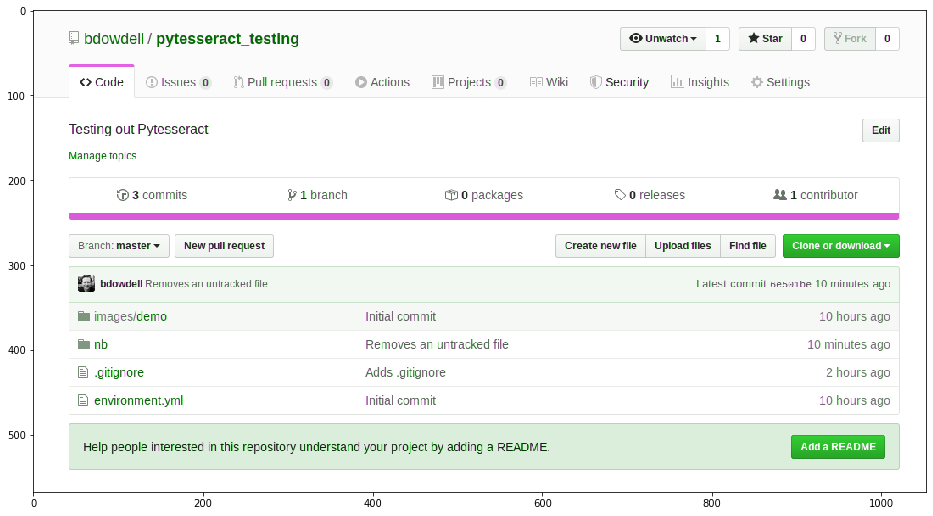

In [55]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot()
ax.imshow(img_github_rgb, )

Not quite qhat I had in mind...

But cv2 has a color convert method to go from BGR to RGB...

why did opencv not just use RGB to begin with??

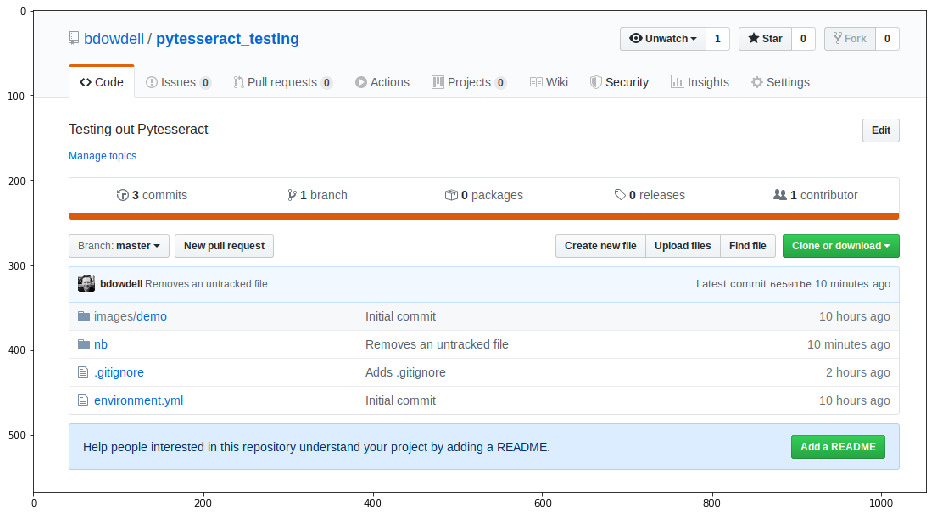

In [56]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot()
ax.imshow(cv2.cvtColor(img_github, cv2.COLOR_BGR2RGB))

That looks better

We can confirm that cv2.imread is properly converting the .png input file to a numpy ndarray

However, the resolution is not that sharp.  Perhaps some image filtering will help?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


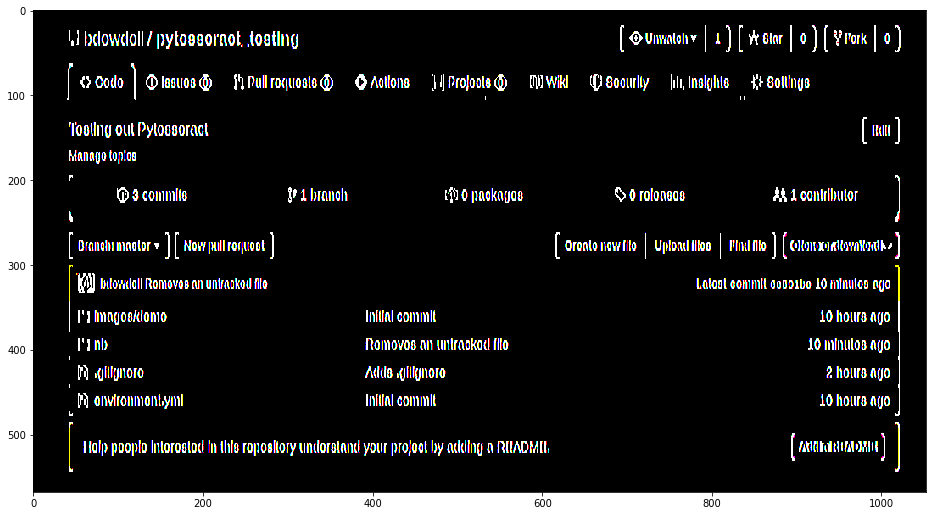

In [73]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot()
ax.imshow(cv2.cvtColor(cv2.Sobel(img_github,cv2.CV_32F,2,0,ksize=5), cv2.COLOR_BGR2RGB))

In [88]:
img_github.dtype

dtype('uint8')

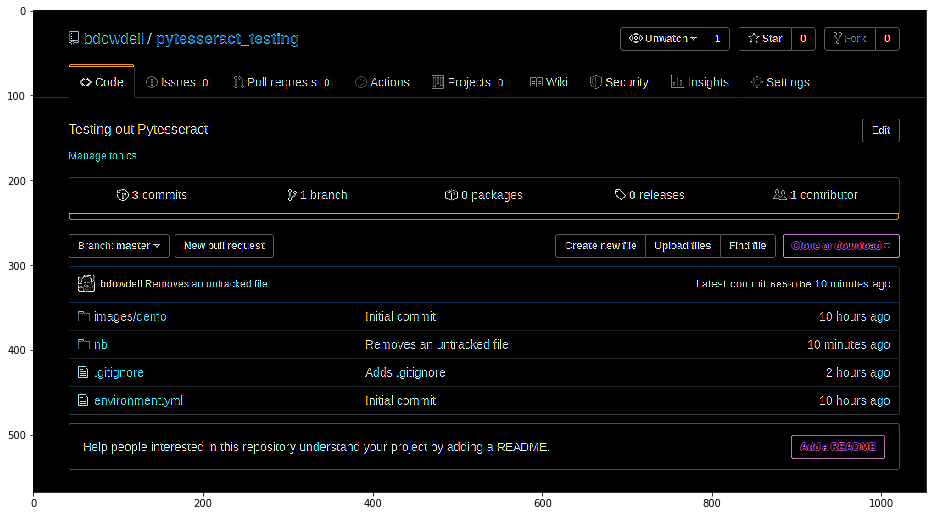

In [91]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot()
ax.imshow(cv2.Laplacian(img_github, cv2.CV_8U))

In [92]:
print(pytesseract.image_to_string(cv2.Laplacian(img_github, cv2.CV_8U)))

aR leo eRe Lom CCTH ETS)

 

oes

 

@Unwatch> | 1

 

 

 

Eo el): SF el) Ec aN a OSS to FST
Sota coc cos ery
Tee

POR eels sae tre) Taare oad PLU moor tale PLcorg
ee eee ere eee Chom
Dre eae Ct) Reese eee On Cy
feo) Initial commit 10 hours ago

on
epee

ee ncns tal Rees

Help people interested in this repository understand your project by adding a README.

Conon cen

eee eo

SOR oe)
Per)

SO er)

ory


Hmm.. Laplacian and Sobel aren't helping yet